# Clasificación de lunares cutáneos en imágenes

<a id="init"></a>
<dl>
  <dt><a href="#Intro">1. Introducción</a></dt>
      <dd>Descripción del proyecto</dd>
  <dt><a href="#EDA">2. EDA</a></dt>
      <dd>Análisis de los datos y procesamiento de imágenes</dd>
  <dt><a href="#Modelo">3. Etrenamiento del modelo</a></dt>
      <dd>Entrenamiento del modelo definitivo</dd>
  <dt><a href="#Resultados">4. Resultados</a></dt>
      <dd>Análisis de los resultados obtenidos</dd>
</dl>

<a id="Intro"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a>

### 1. Introducción

Este proyecto dará respuesta a un problema de clasificación basado en el aprendizaje supervisado. Las imágenes contienen una etiqueta que indica su malignidad, si la imagen contiene un lunar benigno se le asigna el 0 y si, por el contrario, el lunar es maligno, se le asigna el 1.

Para este proyecto se utilizará un Dataset obtenido de Kaggle: [Skin cancer Malignant vs. Benign](https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign?resource=download). El Dataset contiene un conjunto de datos equilibrados con imágenes de lunares cutáneos benignos y malignos. Todas las imágenes tienen las mismas dimensiones (224 x 224).

Contenido:
- ***Train***: Benignos (1440 registros) y Malignos (1197 registros).
- ***Test***: Benignos (360 registros) y Malignos (300 registros).



*El objetivo es entrenar un modelo de clasificación que permita identificar si los lunares cutáneos de las fotografías son malignos.*

<a id="EDA"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a>

### 2. EDA

Librerias

In [1]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import sys

# Importamos todas las librerias de utils
sys.path.append(os.path.realpath('../utils'))
from functions import *

%matplotlib inline
plt.style.use('default')

Muestra del conjunto de imágenes:

In [2]:
image1 = cv2.imread('../data/raw/train/benign/4.jpg')
image2 = cv2.imread('../data/raw/train/malignant/29.jpg')
image3 = cv2.imread('../data/raw/test/benign/18.jpg')
image4 = cv2.imread('../data/raw/test/malignant/24.jpg')

images = [image1,image2,image3,image4]

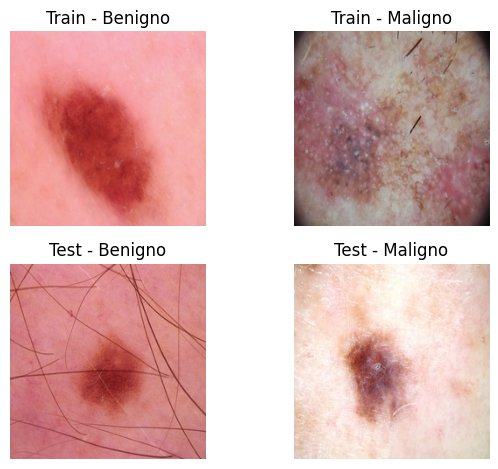

In [3]:
rows=2
cols=2
fig=plt.figure()
axes=[]

for a in range(rows*cols):
    axes.append(fig.add_subplot(rows, cols,a+1) )
    if a%2==0:
        b='Benigno'
    else: b='Maligno'
    if a<2:
        c='Train'
    else:
        c='Test'
    subplot_title=(f'{c} - {b}')
    axes[a].set_title(subplot_title)  
    plt.imshow(bgr2rgb(images[a]))
    plt.axis('off')
    
fig.tight_layout()
plt.show()

**Procesamiento de imágenes**

Uno de los problemas que se puede observar a primera vista es la presencia de vellos en algunas imágenes. Esto puede empeorar la clasificación ya que pueden aparecer patrones que no se corresponderían con malignidad.

Por lo tanto, se deberán procesar las imágenes para eliminar la presencia de vellos.

Pasos para eliminar el vello en las imágenes:
1. Transformar la imagen a escala de grises
2. Aplicar la tranformación morfológica Black Hat en escala de grises
3. Crear una máscara para la tarea de decoloración
4. Aplicar el algoritmo de decoloración en la imagen original usando la máscara.

In [4]:
# PASO1: Convertir a escala de grises
img_grayScale = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
# PASO 2:
# Kernel para el filtrado morfológico
kernel = cv2.getStructuringElement(1,(17,17))
# Filtrado BlackHat para encontrar los contornos del cabello
blackhat = cv2.morphologyEx(img_grayScale, cv2.MORPH_BLACKHAT, kernel)
# PASO 3: Intensificar los contornos del cabello en preparación para el algoritmo de pintura
ret,thresh2 = cv2.threshold(blackhat,12,255,cv2.THRESH_BINARY)
# PASO 4: Pintar la imagen original dependiendo de la máscara
img_filtred = cv2.inpaint(image3,thresh2,1,cv2.INPAINT_TELEA)

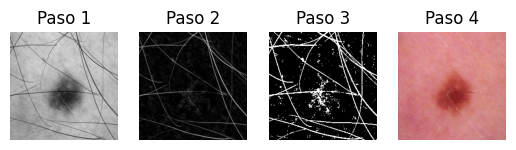

In [5]:
rows = 1
columns = 4
fig = plt.figure()

fig.add_subplot(rows, columns, 1)
plt.imshow(img_grayScale,cmap='gray')
plt.axis('off')
plt.title('Paso 1')
  
fig.add_subplot(rows, columns, 2)
plt.imshow(blackhat,cmap='gray')
plt.axis('off')
plt.title('Paso 2')
  
fig.add_subplot(rows, columns, 3)
plt.imshow(thresh2,cmap='gray')
plt.axis('off')
plt.title('Paso 3')
  
fig.add_subplot(rows, columns, 4)
plt.imshow(bgr2rgb(img_filtred))
plt.axis('off')
plt.title('Paso 4');

Comparación entre la imagen original y la imagen filtrada:

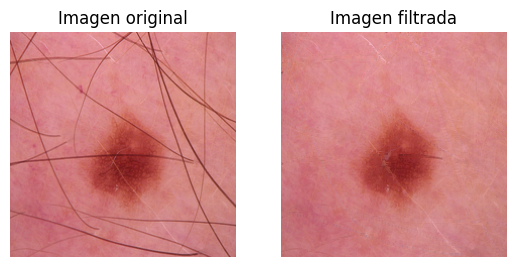

In [6]:
rows = 1
columns = 2
fig = plt.figure()

fig.add_subplot(rows, columns, 1)
plt.imshow(bgr2rgb(image3))
plt.axis('off')
plt.title('Imagen original')
  
fig.add_subplot(rows, columns, 2)
plt.imshow(bgr2rgb(img_filtred))
plt.axis('off')
plt.title('Imagen filtrada');

Aplicamos el procesamiento a imágenes con y sin vellos para evaluar su funcionamiento:

In [7]:
imageA = cv2.imread('../data/raw/train/benign/3.jpg')
imageB = cv2.imread('../data/raw/train/benign/162.jpg')
imageC = cv2.imread('../data/raw/train/benign/201.jpg')
imageD = cv2.imread('../data/raw/train/benign/229.jpg')

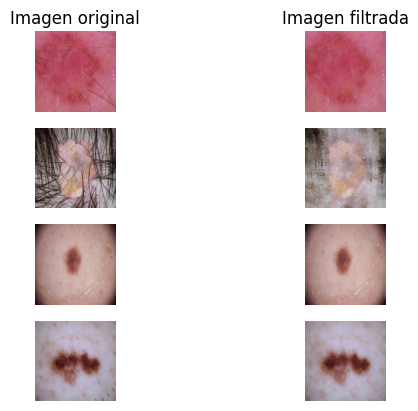

In [8]:
rows = 4
columns = 2
fig = plt.figure()

fig.add_subplot(rows, columns, 1)
plt.imshow(bgr2rgb(imageA))
plt.axis('off')
plt.title('Imagen original')
  
fig.add_subplot(rows, columns, 2)
plt.imshow(bgr2rgb(eliminar_vello(imageA)))
plt.axis('off')
plt.title('Imagen filtrada')

fig.add_subplot(rows, columns, 3)
plt.imshow(bgr2rgb(imageB))
plt.axis('off')
  
fig.add_subplot(rows, columns, 4)
plt.imshow(bgr2rgb(eliminar_vello(imageB)))
plt.axis('off')

fig.add_subplot(rows, columns, 5)
plt.imshow(bgr2rgb(imageC))
plt.axis('off')
  
fig.add_subplot(rows, columns, 6)
plt.imshow(bgr2rgb(eliminar_vello(imageC)))
plt.axis('off')

fig.add_subplot(rows, columns, 7)
plt.imshow(bgr2rgb(imageD))
plt.axis('off')
  
fig.add_subplot(rows, columns, 8)
plt.imshow(bgr2rgb(eliminar_vello(imageD)))
plt.axis('off');

Aplicando la función a diferentes imágenes, se puede observar que el vello se remueve de aquellas imágenes que lo necesitan. Dado que la información de las imágenes sin vello se conserva practicamente en su totalidad, se realizará un procesamiento de todas las imágenes aplicando esta función.

Otra de las transformaciones que se aplicará a las imagenes es la segmentación del lunar, para ello se creará una máscara binaria que elimanrá el fondo de la imagen. Esta función se aplicará después de la eliminación del vello.

In [371]:
gray_example = cv2.cvtColor(eliminar_vello(image1), cv2.COLOR_BGR2GRAY)
thresh, im_bw = cv2.threshold(gray_example, 120, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
mask_inv = cv2.bitwise_not(im_bw) 
res = cv2.bitwise_and(image1,image1,mask = mask_inv)

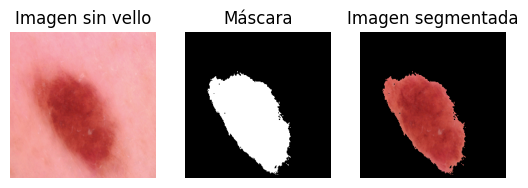

In [372]:
rows = 1
columns = 3
fig = plt.figure()

fig.add_subplot(rows, columns, 1)
plt.imshow(bgr2rgb(eliminar_vello(image1)))
plt.axis('off')
plt.title('Imagen sin vello')
  
fig.add_subplot(rows, columns, 2)
plt.imshow(mask_inv,cmap='gray')
plt.axis('off')
plt.title('Máscara')

fig.add_subplot(rows, columns, 3)
plt.imshow(bgr2rgb(res))
plt.axis('off')
plt.title('Imagen segmentada');

**Datos procesados**

Se crearán 2 dataframes, uno para las imágenes de test y otro para las imágenes de train. También se creará una lista con los valores del target (0 o 1) que se añadirá posteriormente como una columna a cada uno de los dataframes.

Pasos:
* Se leerán las imágenes de cada carpeta y se les aplicará el filtro para eliminar los vellos.
* Se pasarán las imágenes a escala de grises y se redimensionarán. Al ser imágenes de 224 x 224, el resultado final serán 50176 filas para cada imagen.
* Cada imagen se almacenará como una nueva columna. Posteriormente se realizará la matriz transpuesta para convertir las columnas en filas y tener los datos de la imagen en las columnas.

Dimensión final de los dataframes: 
* df_train: 2637 x 50176
* df_test: 660 x 50176

In [290]:
malign_data = '../data/raw/train/malignant'
malign_data2 = '../data/raw/test/malignant'
benign_data = '../data/raw/train/benign'
benign_data2 = '../data/raw/test/benign'

df_test = pd.DataFrame() #Matriz de imágenes
df_train = pd.DataFrame() 
y_train_values = []  #Lista con los valores de target
y_test_values = [] 

count = 0

for img_name in os.listdir(malign_data):
    image = cv2.imread(malign_data+"/"+img_name)
    img_gray = cv2.cvtColor(mask_fondo(image), cv2.COLOR_BGR2GRAY)
    img_one_column_arr = img_gray.reshape((image.shape[0]*image.shape[1]),1)  # (224*224, 1) = (50176, 1)
    df_train[str(count)] = img_one_column_arr[:,0]
    y_train_values.append(1) # 1 = Maligno
    count += 1

for img_name in os.listdir(malign_data2):
    image = cv2.imread(malign_data2+"/"+img_name)
    img_gray = cv2.cvtColor(mask_fondo(image), cv2.COLOR_BGR2GRAY)
    img_one_column_arr = img_gray.reshape((image.shape[0]*image.shape[1]),1) 
    df_test[str(count)] = img_one_column_arr[:,0]
    y_test_values.append(1) # 1 = Malign0
    count += 1

for img_name in os.listdir(benign_data):
    image = cv2.imread(benign_data+"/"+img_name)
    img_gray = cv2.cvtColor(mask_fondo(image), cv2.COLOR_BGR2GRAY)
    img_one_column_arr = img_gray.reshape((image.shape[0]*image.shape[1]), 1)
    df_train[str(count)] = img_one_column_arr[:,0]
    y_train_values.append(0) # 0 = Benigno
    count += 1

for img_name in os.listdir(benign_data2):
    image = cv2.imread(benign_data2+"/"+img_name)
    img_gray = cv2.cvtColor(mask_fondo(image), cv2.COLOR_BGR2GRAY)
    img_one_column_arr = img_gray.reshape((image.shape[0]*image.shape[1]), 1)
    df_test[str(count)] = img_one_column_arr[:,0]
    y_test_values.append(0) # 0 = Benigno
    count += 1

C:\Users\lucy9\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
C:\Users\lucy9\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
C:\Users\lucy9\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

In [291]:
df_train = df_train.T
df_test = df_test.T

In [292]:
df_train.head(3)

,0,1,2,3,4,5,6,7,8,9,...,50166,50167,50168,50169,50170,50171,50172,50173,50174,50175
0,141,138,135,135,134,134,135,136,138,142,...,0,0,0,0,0,0,0,0,0,0
1,33,38,43,48,55,61,68,74,81,86,...,67,61,56,51,45,41,35,31,27,22
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [293]:
print(df_train.shape)
print(df_test.shape)

(2637, 50176)
(660, 50176)


Los datos con los que se trabajará están en escala de grises. Estas imágenes están compuestas por valores que pueden oscilar entre 0 y 255, siendo 0 el negro y 255 el blanco. Por lo tanto, se aplicará una **normalización** a los valores de ambos dataframes, es decir, se dividirán todos los valores por 255.

In [294]:
df_train_Norm = df_train/255
df_test_Norm = df_test/255

In [295]:
df_train_Norm.head(3)

,0,1,2,3,4,5,6,7,8,9,...,50166,50167,50168,50169,50170,50171,50172,50173,50174,50175
0,0.552941,0.541176,0.529412,0.529412,0.525490,0.525490,0.529412,0.533333,0.541176,0.556863,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.129412,0.149020,0.168627,0.188235,0.215686,0.239216,0.266667,0.290196,0.317647,0.337255,...,0.262745,0.239216,0.219608,0.2,0.176471,0.160784,0.137255,0.121569,0.105882,0.086275
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Una vez normalizados los datos, se podrán utilizar los datos para el entrenamiento del modelo.

<a id="Modelo"></a>
<a href="#init"><p style="text-align:right;" href="#init">Volver al índice</p></a>

### 3. Modelo

Se utilizará la técnica del `PCA` para encontrar los valores más relevantes de los datos. El modelo escogido para realizar la clasificaión es el modelo `RandomForestClassifier`. 

In [324]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

Entrenamos con todos los datos:

In [368]:
model = Pipeline(steps = [
                ('scaler',StandardScaler()),
                # ('pca', PCA(n_components=100)),
                ('model', RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=42))
])
model.fit(df_train_Norm,y_train_values)

C:\Users\lucy9\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\lucy9\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(n_jobs=-1, random_state=42))])

In [369]:
y_pred_def = model.predict(df_test_Norm)

print('Accuracy test',model.score(df_test_Norm,y_test_values))
print('Recall test',recall_score(y_test_values,y_pred_def))

C:\Users\lucy9\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\lucy9\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Accuracy test 0.7893939393939394
Recall test 0.7166666666666667


In [370]:
confusion_matrix(y_test_values,y_pred_def)

array([[306,  54],
       [ 85, 215]], dtype=int64)

### Resultados

Después de entrenar el modelo, obtenemos un recall del 71%. Este modelo podría mejorarse utilizando modelos CNN. En futuros trabajos se podría intentar mejorar los resultados obtenidos.